# **RNA (rede neural artificial) para detecção de pneumonia em raio-x**
--- 

In [2]:
# visualizando o diretório principal do notebook
%ls 

'01 - Explorando_o_Jupyter.ipynb'
'02 - Estudo_de_caso_raio_x.ipynb'
'03 - Cães_vs_gatos.ipynb'
'04 - Atividade prática - Construindo uma RNA para classificação de raio-x com pneumonia.ipynb'
 1644155988011.jpeg
 1644236245857.jpeg
 caes-e-gatos/
 caes-e-gatos.zip
 caes-vs-gatos/
 caes-vs-gatos.zip
'Diagramação Visão computacional.pdf'
'Instalando e atualizando as bibliotecas.ipynb'
 model_1_pneumonia.h5
 model_1_pneumonia.h5py/
 model_2_pneumonia.h5
 model_deteccaoPneumoniaRaioX.h5
 model_pneumonia.h5
 model_pneumonia.h5py/
'QualiFacti - Visão computacional aplicada ao reconhecimento de imagens.pdf'
 raio-x-torax/
 raio-x-torax.zip
 RNA_diagnostico_pneumonia_raiox.ipynb


In [3]:
# visualizando o conteúdo da pasta "raio-x-torax"
%ls raio-x-torax/

teste/  treino/


In [4]:
# biblioteca para ignorar mensagens de alertas
import warnings
warnings.filterwarnings('ignore')

Se necessário instalar a biblioteca `"opencv"` descomente o código abaixo.

In [5]:
#!pip install opencv-python 

In [6]:
# importnando as bibliotecas
import numpy as np  # para funções matemáticas
import cv2          # para visualização de imagem

In [7]:
# visualizando as versões das bibliotecas utilizadas
print(np.__version__)
print(cv2.__version__)

1.21.5
4.5.5


In [8]:
# biblioteca para acessar o SO (sistema operacional)
import os

# função para auxiliar na visualização de imagens do conjunto de dados
def load_images(directory, n_images):
    images = []
    i = 0

    for file in os.listdir(directory):
        filename = directory + file 
        image = cv2.imread(filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = np.asarray(image)
        images.append(image)

        i += 1

        if i >= n_images:
            break

    return np.asarray(images)

In [9]:
# utilizando a função para acessar a pasta com as imagens e a quantidade de interesse
num_images = 15
images = load_images('raio-x-torax/treino/', num_images)

In [10]:
# visualizando o tipo de objeto e imprimindo-o
print(type(images))
images

<class 'numpy.ndarray'>


array([array([[[ 0,  0,  0],
               [ 0,  0,  0],
               [ 0,  0,  0],
               ...,
               [78, 78, 78],
               [81, 81, 81],
               [83, 83, 83]],

              [[ 0,  0,  0],
               [ 0,  0,  0],
               [ 0,  0,  0],
               ...,
               [80, 80, 80],
               [82, 82, 82],
               [84, 84, 84]],

              [[ 0,  0,  0],
               [ 0,  0,  0],
               [ 0,  0,  0],
               ...,
               [79, 79, 79],
               [80, 80, 80],
               [80, 80, 80]],

              ...,

              [[ 0,  0,  0],
               [ 0,  0,  0],
               [ 0,  0,  0],
               ...,
               [ 4,  4,  4],
               [ 5,  5,  5],
               [ 5,  5,  5]],

              [[ 0,  0,  0],
               [ 0,  0,  0],
               [ 0,  0,  0],
               ...,
               [ 4,  4,  4],
               [ 4,  4,  4],
               [ 5,  5,  5]],



In [11]:
# biblioteca para visualização gráfica
import matplotlib.pyplot as plt

# configurando o ambiente 
%matplotlib inline

In [12]:
# versão da biblioteca utilizada
import matplotlib
print(matplotlib.__version__)

3.5.1


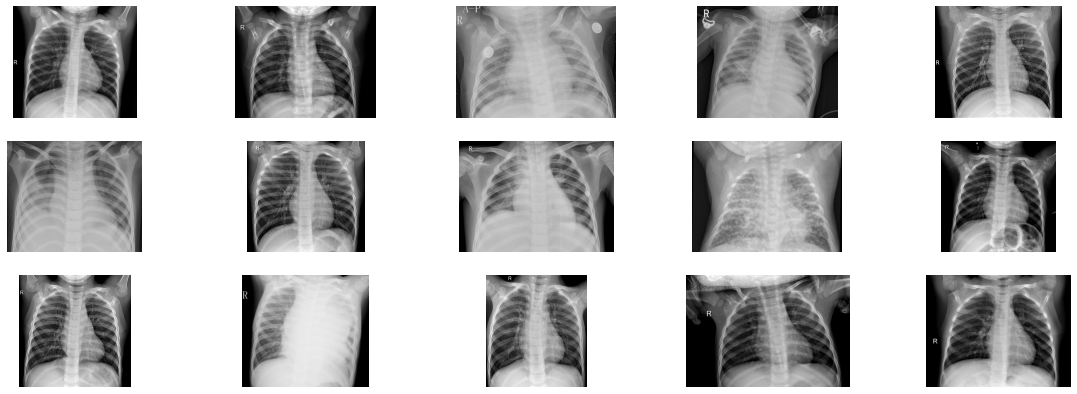

In [13]:
# realizando um laço de repetição para plotar as imagens
plt.figure(figsize=(20,7))

for i in range(num_images):
    plt.subplot(3,5, 1 + i)
    plt.axis('off')
    plt.imshow(images[i])

plt.show()

In [14]:

# instanciando o caminho do diretório/pasta das imagens de treino
train_filepath = os.listdir('raio-x-torax/treino')

# lista para salvar as informações
categories = []

# realizando um laço de repetição e salvando os resultados na lista "categories"
for f_name in train_filepath:
    category = f_name.split('.')[0]

    if category == 'pneumonia':
        categories.append(1)
    else:
        categories.append(0)

In [16]:
# importando biblioteca para manipulação e análise de dados
import pandas as pd

# visualizando a versão da biblioteca utilizada
print(pd.__version__)

1.3.5


In [17]:
# instanciando um dataframe com as informações em:
# 'filename': train_filepath
# 'category': categories

# utilizando o formato de dicionário
df = pd.DataFrame({
    'filename': train_filepath,
    'category': categories
})

# visualizando as 10 primeiras observações 
df.head(10)

,filename,category
0,normal.7.jpeg,0
1,normal.47.jpeg,0
2,pneumonia.11.jpeg,1
3,pneumonia.19.jpeg,1
4,normal.23.jpeg,0
5,pneumonia.45.jpeg,1
6,normal.14.jpeg,0
7,pneumonia.38.jpeg,1
8,pneumonia.9.jpeg,1
9,normal.35.jpeg,0


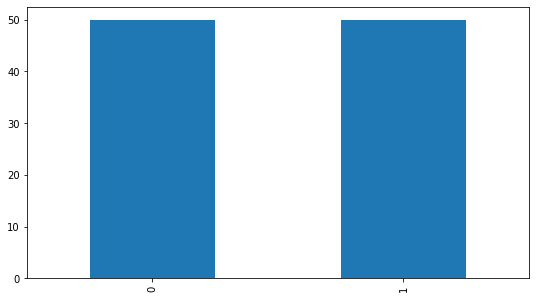

In [18]:
# plotando gráfico de barras das instâncias presentes em cada classe
df['category'].value_counts().plot.bar(figsize=(9,5));

In [19]:
# visualizando a quantidade de observações e a frequência em cada classe
print(
    df['category'].value_counts(),
    round(df['category'].value_counts(normalize=True) * 100, 2),
    sep='\n\n'
)

0    50
1    50
Name: category, dtype: int64

0    50.0
1    50.0
Name: category, dtype: float64


In [20]:
# importando as funções necessárias para construção do modelo de RNA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,\
                                    Dropout, Flatten, Dense,\
                                    Activation, BatchNormalization

In [21]:
# instanciando as propriedades das imagens
image_widht = 128                           # largura da imagem
image_height = 128                          # altura da imagem
image_size = (image_widht, image_height)    # tamanho da imagem
image_channels = 3                          # quantidade de canais das cores (RGB)

In [22]:
# instanciando o modelo de rede neural artificial
model = Sequential()

# definindo as camadas da RNA
model.add(Conv2D(32, (3, 3), activation='relu',
                 input_shape=(image_widht, image_height, image_channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))


In [23]:
# compilando o modelo e definindo a função de perda, otimizador e a métrica
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [24]:
# visualizando o sumário geral do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [25]:
# importando as funções de parada e redução da taxa de aprendizagem
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [26]:
# instanciando a função de parada
early_stop = EarlyStopping(patience=50)

# instanciando a redução da taxa de aprendizagem
# métricas que podem ser utilizadas: loss,accuracy,val_loss,val_accuracy e lr
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, verbose=1, 
                                            factor=0.5, lr=0.1e-4) # 0.00001 = 0.1e-4

# instanciando o "callbacks" com os obejtos instanciados acima
callbacks=[early_stop, learning_rate_reduction]

In [27]:
# transformando as instâncias da variável alvo de numérico para categórico
df['category'] = df['category'].replace({0: 'normal', 1: 'pneumonia'})

In [28]:
# visualizando as instâncias únicas presentes na variável alvo
df['category'].unique()

array(['normal', 'pneumonia'], dtype=object)

In [29]:
# função para realizar o particionamento dos dados
from sklearn.model_selection import train_test_split

In [30]:
# instanciando os dados de treino e validação
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

In [31]:
# resetando os índices dos conjuntos de dados do treino e validação
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [32]:
# instanciando a quantidade de instâncias nos conjuntos de dados de treino e validação
# total_train = train_df.shape[0]
# total_validate = validate_df.shape[0]
# batch_size = 10

# total_train, total_validate, batch_size

In [33]:
# instanciando a quantidade de observações nos conjuntos de dados de treino e validação
total_train = len(train_df)
total_validate = len(validate_df)
batch_size = 10

# visualizando a quantidade de observações nos objetos
total_train, total_validate, batch_size

(80, 20, 10)

In [34]:
# importando as funções para RNA (rede neural artificial)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# definindo o gerador de treino
train_datagenerator = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# visualizando o endereço de memória do objeto
train_datagenerator

In [36]:
# instanciando os dados do gerador de treino
train_generator = train_datagenerator.flow_from_dataframe(
    train_df,
    'raio-x-torax/treino',
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_mode='categorical',
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
train_generator

Found 80 validated image filenames belonging to 2 classes.


In [37]:
# definindo o gerador de validação
validation_datagenerator = ImageDataGenerator(rescale=1.0 / 255)
validation_datagenerator  # visualizando o endereço de memória do objeto

In [38]:
# definindo os dados do gerador de validação
validation_generator = validation_datagenerator.flow_from_dataframe(
    validate_df,
    'raio-x-torax/treino/',
    x_col='filename',
    y_col='category',
    target_size=image_size,
    class_model='categorical',
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
validation_generator

Found 20 validated image filenames belonging to 2 classes.


In [39]:
# definindo o gerador de teste
test_datagenerator = ImageDataGenerator(
    rotation_range=15,
    rescale=1.0 / 255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# visualizando o endereço de memória do objeto
test_datagenerator

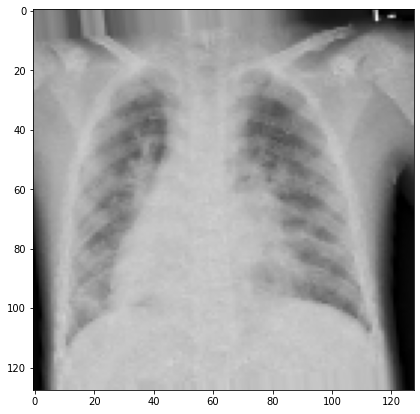

In [40]:
# plotando uma imagem do conjunto de dados de treino
X, y = train_generator.next()
plt.figure(figsize=(9, 7))

for i in range(0, 1):
    random_image = X[i]
    plt.imshow(random_image)
    plt.show();

In [41]:
# definindo o número de épocas de treinamento
epochs = 500

# realizando o treinamento do modelo
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)

Epoch 1/500
8/8 [==============================] - 15s 1s/step - loss: 0.6055 - accuracy: 0.8125 - val_loss: 3.1005 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 2/500
8/8 [==============================] - 3s 377ms/step - loss: 0.0666 - accuracy: 0.9750 - val_loss: 3.8730 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 3/500
8/8 [==============================] - ETA: 0s - loss: 0.1991 - accuracy: 0.9625
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
8/8 [==============================] - 3s 379ms/step - loss: 0.1991 - accuracy: 0.9625 - val_loss: 6.0756 - val_accuracy: 0.3500 - lr: 0.0010
Epoch 4/500
8/8 [==============================] - 4s 441ms/step - loss: 0.3965 - accuracy: 0.8750 - val_loss: 9.4967 - val_accuracy: 0.3500 - lr: 5.0000e-04
Epoch 5/500
8/8 [==============================] - ETA: 0s - loss: 0.0739 - accuracy: 0.9750
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
8/8 [==============================] - 4s 435ms/step - l

Se necessário instalar as bibliotecas descomente os códigos abaixos.

In [42]:
# pip install h5py --upgrade

In [43]:
# pip install h5 --upgrade

In [44]:
# bibliotecas que podemos usar para salvar o modelo
import h5py
import h5

In [45]:
# versão atual da biblioteca
print(h5py.__version__)
print(h5.__version__)

3.6.0
0.5.2


In [46]:
# realizando teste de funcionalidade da biblioteca
# 0: não
# 1: sim
h5py.run_tests()

1

Para esse caso, utilizarei a biblioteca `h5` para salvar o modelo.

In [47]:
# salvando o modelo
model.save('model_deteccaoPneumoniaRaioX.h5')
model # visualizando o endereço de memória do objeto

In [ ]:
# salvando o modelo
# model.save('model_deteccaoPneumoniaRaioX.h5py')
# model # visualizando o endereço de memória do objeto

In [48]:
# instanciando os dados de teste
test_filepath = os.listdir('raio-x-torax/teste/')

In [51]:
# instanciando um dataframe com os dados de teste
test_df = pd.DataFrame(
    {'filename': test_filepath}
)

# visualizando as observações do dataframe criado
test_df

,filename
0,7.jpeg
1,36.jpeg
2,4.jpeg
3,16.jpeg
4,8.jpeg
5,45.jpeg
6,23.jpeg
7,21.jpeg
8,9.jpeg
9,15.jpeg


In [52]:
# instanciando os dados do gerador de teste
test_generator = train_datagenerator.flow_from_dataframe(
    test_df,
    'raio-x-torax/teste',
    x_col='filename',
    y_col=None,
    target_size=image_size,
    class_mode=None,
    batch_size=batch_size
)

# visualizando o endereço de memória do objeto
test_generator

Found 50 validated image filenames.


In [53]:
# definindo o número de amostras
nb_samples = test_df.shape[0]
nb_samples  # visualizando a quantidade de amostras

50

In [54]:
# realizando as predições com o modelo
predict = model.predict(test_generator, steps=np.ceil(nb_samples / batch_size))
predict  # visualizando as predições

array([[3.41857698e-09, 1.00000000e+00],
       [7.89069097e-33, 1.00000000e+00],
       [1.00000000e+00, 9.56118085e-34],
       [2.10338464e-18, 1.00000000e+00],
       [8.88010131e-19, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [8.21054786e-14, 1.00000000e+00],
       [7.21066006e-20, 1.00000000e+00],
       [1.27991625e-17, 1.00000000e+00],
       [1.00000000e+00, 2.44879065e-25],
       [5.31035887e-36, 1.00000000e+00],
       [4.62810814e-34, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [7.67042555e-31, 1.00000000e+00],
       [2.32644311e-24, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.18786638e-14, 1.00000000e+00],
       [4.04637958e-24, 1.00000000e+00],
       [1.14854050e-31, 1.00000000e+00],
       [7.378018

In [55]:
# realizando a conversão dos rótulos (labels) de numérico para categórico
test_df['category'] = np.argmax(predict, axis=-1)

label_map = dict((values, keys) for keys, values in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

test_df['category'] = test_df['category'].replace(
    {'pneumonia': 1, 'normal': 0}
)

# visualizando o dataframe criado
test_df

,filename,category
0,7.jpeg,1
1,36.jpeg,1
2,4.jpeg,0
3,16.jpeg,1
4,8.jpeg,1
5,45.jpeg,1
6,23.jpeg,1
7,21.jpeg,1
8,9.jpeg,1
9,15.jpeg,1


In [56]:
# instanciando 18 amostras aleatórias do dataframe "test_df"
# sample_test = test_df.head(18)
sample_test = test_df.sample(18)

# resetando os índices
sample_test = sample_test.reset_index(drop=True)
sample_test  # visualizando os dados das amostras selecionadas

,filename,category
0,26.jpeg,1
1,11.jpeg,1
2,8.jpeg,1
3,28.jpeg,1
4,13.jpeg,1
5,29.jpeg,1
6,27.jpeg,1
7,37.jpeg,1
8,20.jpeg,1
9,3.jpeg,1


In [57]:
# importando a função para leitura de imagem
from tensorflow.keras.preprocessing.image import load_img

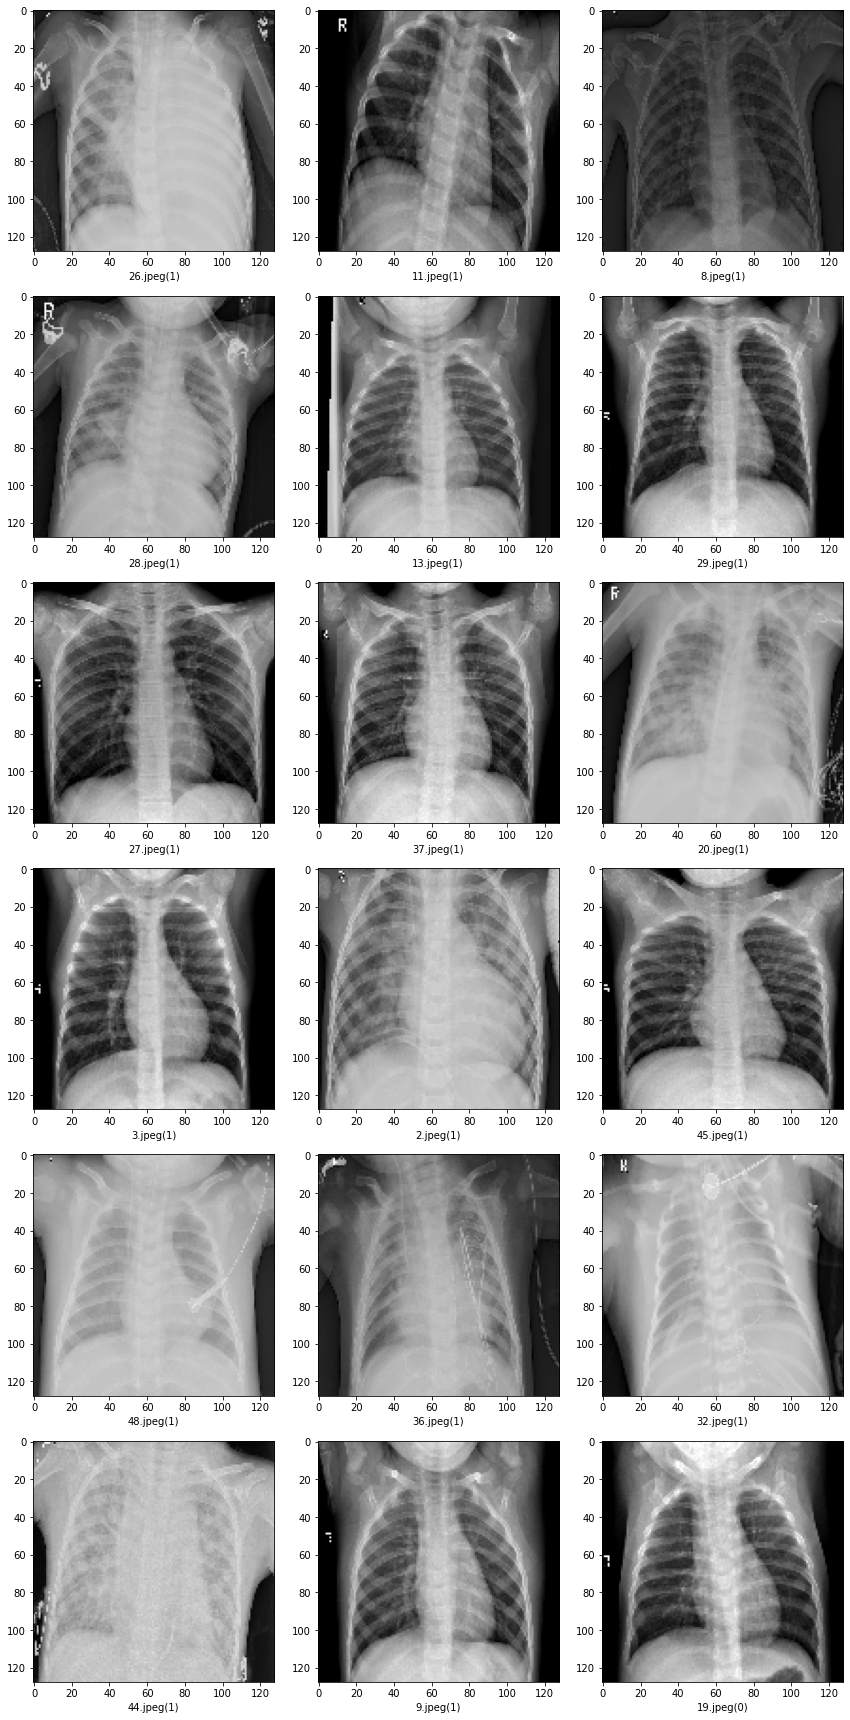

In [58]:
# plotando as 18 imagens da amostra
plt.figure(figsize=(12, 24))

for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']

    img = load_img('raio-x-torax/teste/' + filename, target_size=image_size)

    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')

plt.tight_layout()
plt.show()

In [59]:
# importando as bibliotecas e as funções
import numpy as np
import cv2
import tensorflow as tf

from tensorflow import keras
from PIL import Image

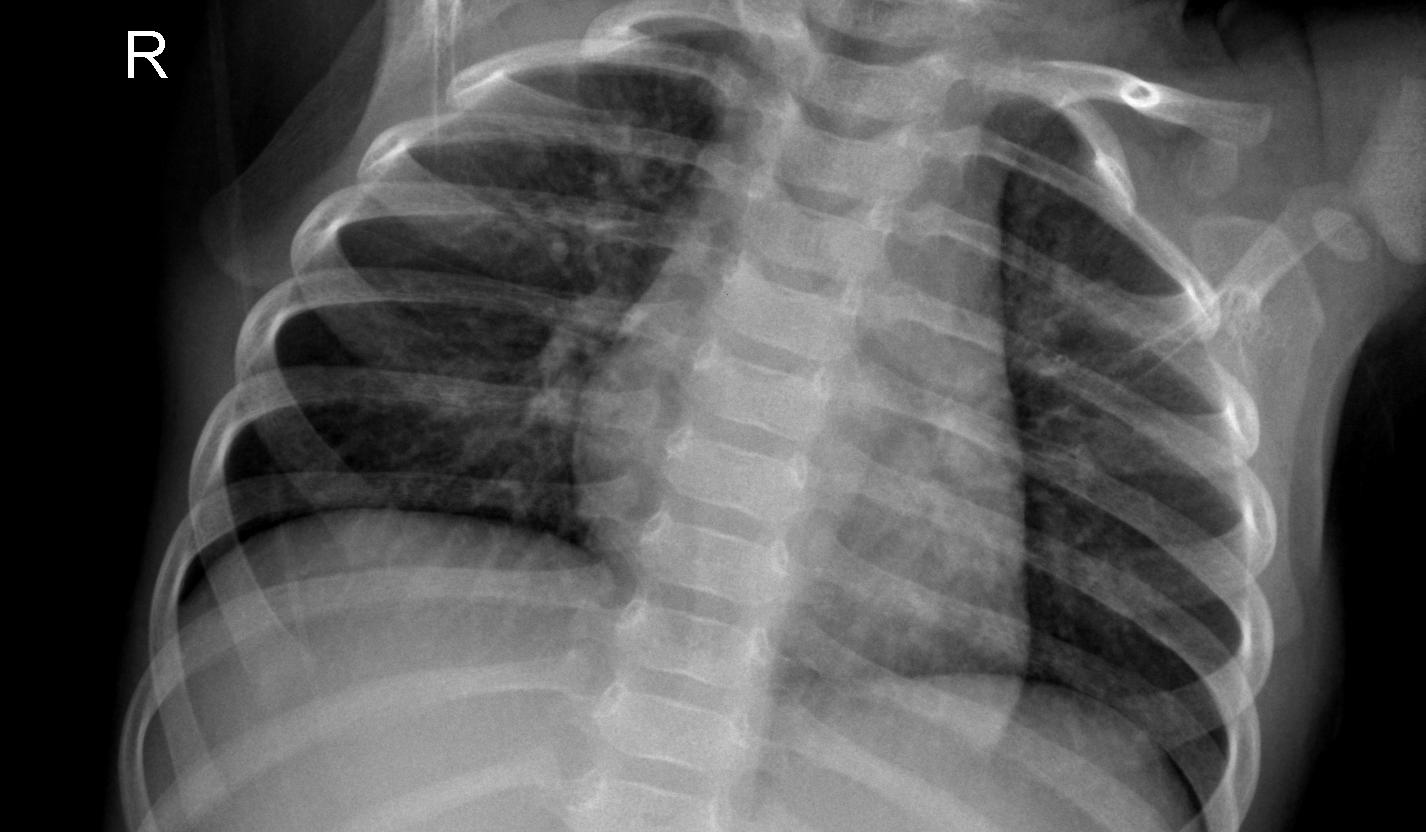

In [106]:
# instanciando uma imagem
i = Image.open('raio-x-torax/teste/11.jpeg')

# visualizando a imagem
i

In [107]:
# redimensionado a imagem
img = i.resize(image_size)
# img = (np.random.standard_normal([128,128,3]) * 255).astype(np.uint8)
img = (np.random.standard_normal([128, 128, 3]) * 255)
img = np.expand_dims(img, axis=0)
img = np.array(img)
img = img / 255

# realizando a predição da imagem com o modelo
pred_img = model.predict([img])[0]
pred_img  # visualizando o resultado da predição

array([1., 0.], dtype=float32)

Diagnóstico indicado: RX normal


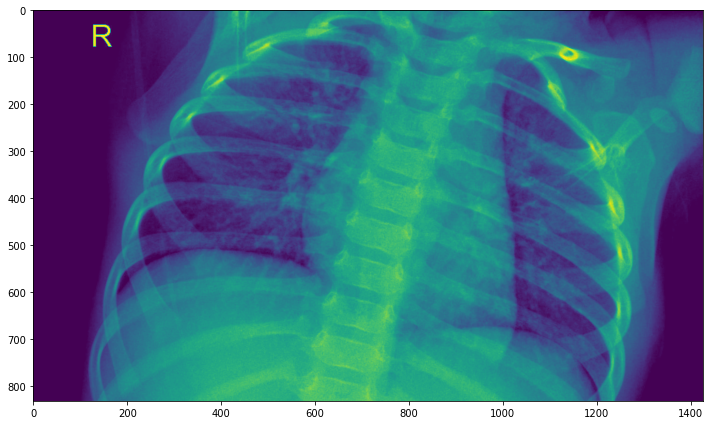

In [108]:
# plotando a imagem e seu dignóstico
if pred_img[0] > pred_img[1]:
    print('Diagnóstico indicado: RX normal')
else:
    print('Diagnóstico indicado: RX pneumonia')

plt.figure(figsize=(12, 24))
plt.imshow(i)
plt.show()

In [109]:
# importando as bibliotecas e as funções
import numpy as np
import os
import tkinter as tk

from tkinter import *
from tkinter import filedialog
from PIL import ImageTk, Image
from tensorflow.keras.models import load_model

In [64]:
# teste de funcionalidade da biblioteca 
# import tkinter
# tkinter._test()

In [110]:
# carregando o modelo no objeto "model"
model = load_model('model_deteccaoPneumoniaRaioX.h5')
model   # visualizando o endereço de memória do objeto

In [ ]:
# # carregando o modelo no objeto "model"
# model = load_model('model_deteccaoPneumoniaRaioX.h5py')
# model   # visualizando o endereço de memória do objeto

In [111]:
# iniciando o ambiente GUI
top = tk.Tk()
top.geometry('800x600')
top.title('Classificação para raio-x de tórax')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 15, 'bold'))

sign_image = Label(top)


In [112]:
# função para classificação da imagem
def classify(file_path):
    global label_packed
    
    image = Image.open(file_path)
    image = (np.random.standard_normal([128,128,3]) * 255)
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    image = image / 255
    
    pred = model.predict([image])[0]
    basename = os.path.basename(file_path)
    name = int(basename.rsplit('.', 1)[0]) 
    
    if pred[0] > pred[1]:
        sign ='Diagnóstico indicado: RX normal'
    else:
        sign = 'Diagnóstico indicado: RX pneumonia'
    print(sign)
    
    label.configure(foreground='#011638', text=f'{sign} {str(max(pred * 100))} {str("%")}') 

In [113]:
# função para exibição da janela
def show_classify_button(file_path):
    classify_b = Button(top, text='Classificar imagem', command=lambda: classify(file_path), padx=10, pady=5)
    classify_b.configure(background='#364156', foreground='white', font=('arial', 10, 'bold'))
    classify_b.place(relx=0.79, rely=0.46)

In [115]:
# função para realizar o carregamento da imagem
def upload_image():
    try:
        file_path = filedialog.askopenfilename()

        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))

        img = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=img)
        sign_image.image = img

        label.configure(text='')

        show_classify_button(file_path)

    except:
        pass

In [116]:
# gerando a janela para carregamento da imagem
upload = Button(top, text='Upload da imagem',
                command=upload_image, padx=10, pady=5)
upload.configure(background='#364156', foreground='white',
                 font=('arial', 10, 'bold'))
upload.pack(side=BOTTOM, pady=50)

sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)

heading = Label(top, text='Classificação para raio-x de tórax',
                pady=20, font=('arial', 20, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364156')
heading.pack()

top.mainloop()

Diagnóstico indicado: RX normal
